In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('imdb.csv')

In [9]:
df=df.drop(['No_of_Votes', 'Gross', 'Meta_score'],axis=1)

KeyError: "['No_of_Votes', 'Gross', 'Meta_score'] not found in axis"

In [ ]:
df.head(5)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

# Data Visualization

In [ ]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df['Series_Title'] = df['Series_Title'].fillna("").astype('str')
title_corpus = ' '.join(df['Series_Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(8,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

array([[<Axes: title={'center': 'IMDB_Rating'}>]], dtype=object)

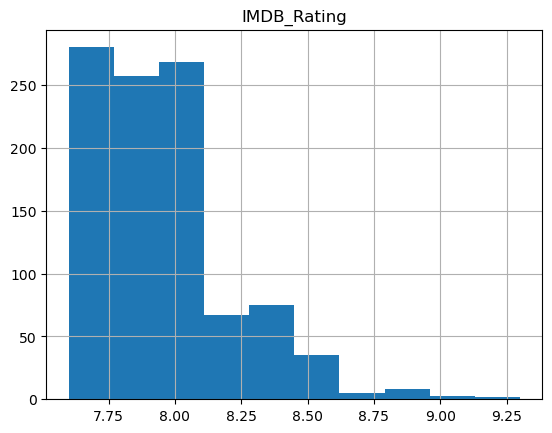

In [10]:
df.hist(column='IMDB_Rating')

# Genre Filter

In [11]:
genre_labels = set()
a=df['Genre'].str.split(',').values
b=df['Genre'].str.split(', ').values
c=df['Genre'].str.split(' ,').values
d=np.concatenate((np.concatenate((a, b), axis=0),c),axis=0)

for s in np.logical_and(a, b, c):
   genre_labels = genre_labels.union(set(s))

print(genre_labels)

{'War', 'Crime', 'Music', 'Mystery', 'Drama', 'Film-Noir', 'Animation', 'History', 'Sport', 'Musical', 'Biography', 'Adventure', 'Romance', 'Family', 'Sci-Fi', 'Thriller', 'Western', 'Fantasy', 'Horror', 'Comedy', 'Action'}


In [12]:
def count_word(df,Genre, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in np.logical_and(a, b, c):        
        if type(census_keywords) == int and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
   
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(df, 'Genre', genre_labels)
keyword_occurences[:]


[['Drama', 724],
 ['Comedy', 233],
 ['Crime', 209],
 ['Adventure', 196],
 ['Action', 189],
 ['Thriller', 137],
 ['Romance', 125],
 ['Biography', 109],
 ['Mystery', 99],
 ['Animation', 82],
 ['Sci-Fi', 67],
 ['Fantasy', 66],
 ['History', 56],
 ['Family', 56],
 ['War', 51],
 ['Music', 35],
 ['Horror', 32],
 ['Western', 20],
 ['Film-Noir', 19],
 ['Sport', 19],
 ['Musical', 17]]

In [13]:
df['Genre'] = df['Genre'].fillna("").astype('str')
print(type(df['Genre']))

<class 'pandas.core.series.Series'>


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['Genre'])
tfidf_matrix.shape

(1000, 132)

In [15]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.32753693, 0.2090213 , 0.32753693],
       [0.32753693, 1.        , 0.63816101, 1.        ],
       [0.2090213 , 0.63816101, 1.        , 0.63816101],
       [0.32753693, 1.        , 0.63816101, 1.        ]])

In [16]:
# Build a 1-dimensional array with movie titles
titles = df['Series_Title']
indices = pd.Series(df.index, index=df['Series_Title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    if title in titles.values:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:50]
        movie_indices = [i[0] for i in sim_scores]
        name2 = titles.iloc[movie_indices]
        return name2

    dff = df[df['Series_Title'].str.contains(title)]
    x=dff['Series_Title'].iloc[0]
    y=genre_recommendations(x)
    return y

In [17]:
genre_recommendations('Harry Potter').head(10)

226    Harry Potter and the Deathly Hallows: Part 2
377                                        Big Fish
497                                        The Fall
498                                      Life of Pi
537                              La montaña sagrada
964                                        Dead Man
292                           El ángel exterminador
25                                   The Green Mile
487                          Låt den rätte komma in
762                           Death Note: Desu nôto
Name: Series_Title, dtype: object

In [18]:
from sklearn.utils import shuffle
genres = df['Series_Title']
indices = pd.Series(df.index, index=df['Series_Title'])

def genre_genre_recommendations(genre):
    dfg = df[df['Genre'].str.contains(genre)]
    dfg=shuffle(dfg)
    x=dfg['Series_Title']
    return x

In [19]:
genre_genre_recommendations('Fantasy').head(10)

376    Pirates of the Caribbean: The Curse of the Bla...
912                                           Zombieland
32                                 It's a Wonderful Life
487                               Låt den rätte komma in
919                                             Stardust
875                                             Fantasia
498                                           Life of Pi
178                      Monty Python and the Holy Grail
593                                           About Time
685                                         Ghostbusters
Name: Series_Title, dtype: object

# Movie Filter

In [20]:
df['Series_Title'] = df['Series_Title'].fillna("").astype('str')

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer ()
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['Series_Title'])
tfidf_matrix.shape

(1000, 2544)

In [22]:
from sklearn.metrics.pairwise import linear_kernel
cosine = linear_kernel(tfidf_matrix,tfidf_matrix)
#cosine[:5,:5]

In [23]:
titles = df['Series_Title']
indices = pd.Series(df.index, index=df['Series_Title'])
df2 = titles.to_frame()

def movie_recommendations(title):
    if title in titles.values:
        idx = indices[title]
        sim_scores = list(enumerate(cosine[idx]>0.0))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        aa=[f[1] for f in sim_scores]
        b=aa.count(True)
        sim_scores = sim_scores[0:b]
        movie_indices = [i[0] for i in sim_scores]
        name2 = titles.iloc[movie_indices]
        return name2

    dff = df[df['Series_Title'].str.contains(title)]
    name = dff['Series_Title']
    return name 

In [24]:
movie_recommendations('Harry')

226    Harry Potter and the Deathly Hallows: Part 2
506        Harry Potter and the Prisoner of Azkaban
755    Harry Potter and the Deathly Hallows: Part 1
781             Harry Potter and the Goblet of Fire
853                                     Dirty Harry
927          Harry Potter and the Half-Blood Prince
947           Harry Potter and the Sorcerer's Stone
975                         When Harry Met Sally...
Name: Series_Title, dtype: object

In [25]:
movie_recommendations('12 Angry Men')

4                    12 Angry Men
215              12 Years a Slave
232        No Country for Old Men
336                 Short Term 12
479    X-Men: Days of Future Past
513               Children of Men
536       All the President's Men
794     Hedwig and the Angry Inch
824                A Few Good Men
Name: Series_Title, dtype: object

# Director Filter

In [28]:
def directors_recommendations(Director):
    dd = df[df['Director'].str.contains(Director)]
    return dd['Series_Title']

In [29]:
director_recommendations('Yates')

NameError: name 'director_recommendations' is not defined

# Rating Filter

In [93]:
from sklearn.utils import shuffle
genres = df['Series_Title']
indices = pd.Series(df.index, index=df['Series_Title'])


def genre_rating_recommendations(genre):
    dd = df
    dd['IMDB_Rating'] = dd['IMDB_Rating'].apply(math.floor)
    df3 = dd['IMDB_Rating']
    dfg = df[df['Genre'].str.contains(genre)]
    dfg.insert(1,'Rating',df3)
    dfg = shuffle(dfg)
    dfg = dfg.sort_values('Rating', ascending = False, ignore_index = True)
    x=dfg['Series_Title']
    return x

In [99]:
genre_rating_recommendations('Romance')

0             Lage Raho Munna Bhai
1              Singin' in the Rain
2                       Casablanca
3                     Forrest Gump
4       The Shop Around the Corner
                  ...             
120          From Here to Eternity
121                    Vicky Donor
122             As Good as It Gets
123    The Broken Circle Breakdown
124              Pride & Prejudice
Name: Series_Title, Length: 125, dtype: object

# Actor Filter

In [62]:
aa = df[['Star1','Star2','Star3','Star4']]
def actors_recommendations(Actor):
    dd = df[aa.apply(lambda row: any(Actor in str(cell) for cell in row), axis=1)]
    dd = shuffle(dd)
    return dd['Series_Title']

In [63]:
#val = input()
actors_recommendations('Saif')

265    Dà hóng denglong gaogao guà
374                  Kal Ho Naa Ho
240                 Dil Chahta Hai
Name: Series_Title, dtype: object

# Combine Filter

In [61]:
aa = df[['Star1','Star2','Star3','Star4']]
def actor_recommendations(Actor):
    dd = df[aa.apply(lambda row: any(Actor in str(cell) for cell in row), axis=1)]
    dd = shuffle(dd)
    s1 = set(dd['Series_Title'])
    return s1

def genre_rating_recommendations(genre):
    dd = df
    dd['IMDB_Rating'] = dd['IMDB_Rating'].apply(math.floor)
    df3 = dd['IMDB_Rating']
    dfg = df[df['Genre'].str.contains(genre)]
    dfg.insert(1,'Rating',df3)
    dfg = shuffle(dfg)
    dfg = dfg.sort_values('Rating', ascending = False, ignore_index = True)
    s2 = set(dfg['Series_Title'])
    return s2

def directors_recommendations(Director):
    dd = df[df['Director'].str.contains(Director)]
    s3 = set(dd['Series_Title'])
    return s3

In [5]:
n = int(input("Enter No. of Actors: "))
m={}
w={}
y={}
if n != -1:
    x = input("Enter: ")
    m = actor_recommendations(x)

    for i in range(1,n):
        x = input("Enter: ")
        y = actor_recommendations(x)
        m = y.intersection(m)
        
n = int(input("Enter No. of Genres: "))

if n != -1:
    if m == {}:
        x = input("Enter: ")
        w = genre_rating_recommendations(x)
        for i in range(1,n):
            x = input("Enter: ")
            y = genre_rating_recommendations(x)
            w = y.intersection(w)
    else:
        for i in range(0,n):
            x = input("Enter: ")
            y = genre_rating_recommendations(x)
            m = y.intersection(m)

for i in range (0,1): 
    x = input("Enter Director: ")
    if x == '-1': 
        if m != {}:
            y=m
        elif w != {}:
            y=m
        else:
            print("Input Not Found")
            break
    else:
        y = directors_recommendations(x)
        if m != {} and w == {}:
            y = y.intersection(m)
        elif m == {} and w != {}:
            y = y.intersection(w)     
        else:
            print()
    mov_new = sorted(y)
    movies_new = pd.DataFrame([sub.split(',') for sub in mov_new])
    mov = movies_new.to_string(header = False)
    print(mov)

Enter No. of Actors: 1
Enter: Aks


NameError: name 'actor_recommendations' is not defined